# **Preterm Birth Rate Prediction Model(from Data science workshop)**

### **Part 1: Introduction to Programming Tools**
Loading Dataset

In [ ]:
# Import libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [ ]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving chicago_dataset.csv to chicago_dataset.csv


In [ ]:
# Load dataset
dataset = pd.read_csv(io.StringIO(uploaded['chicago_dataset.csv'].decode('utf-8')))
dataset.head()

,Community Area,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,Low Birth Weight,Prenatal Care,Preterm Births,Teen Birth Rate,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes,Stroke,Tuberculosis,Firearm
0,Rogers Park,23714,7.5,22.7,7.9,28.8,18.1,16.4,11.0,73.0,11.2,40.8,36.7,23.3,21.7,77.1,33.7,11.4,5.2
1,West Ridge,21375,7.9,15.1,7.0,38.3,19.6,17.3,8.1,71.1,8.3,29.9,36.0,20.2,14.2,60.5,34.7,8.9,3.7
2,Uptown,32355,7.7,22.7,4.6,22.2,13.6,13.1,8.3,77.7,10.3,35.1,50.5,21.3,25.2,80.0,41.7,13.6,4.6
3,Lincoln Square,35503,6.8,9.5,3.1,25.6,12.5,17.1,8.1,80.5,9.7,38.4,43.1,21.7,27.6,55.4,36.9,8.5,6.1
4,North Center,51615,4.5,7.1,0.2,25.5,5.4,22.4,9.1,80.4,9.8,8.4,42.4,16.6,15.1,49.8,41.6,1.9,1.0


**What is your assigned variable?**

*ANSWER*: Preterm Births

### **Part 2: Descriptive Statistics**
Computing Mean, Median, and Quartiles

In [ ]:
# Compute the mean of your assigned variable
print(dataset['Preterm Births'].mean())

11.264935064935065


In [ ]:
# Compute the median of your assigned variable
print(dataset['Preterm Births'].median())

10.8


In [ ]:
# Compute the first, second, and third quartile of your assigned variable
print(dataset['Preterm Births'].quantile([.25, .5, 0.75]))

0.25     8.8
0.50    10.8
0.75    13.7
Name: Preterm Births, dtype: float64


In [ ]:
# Compute all descriptive statistics for Chicago's community areas
dataset.describe()

,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,Low Birth Weight,Prenatal Care,Preterm Births,Teen Birth Rate,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes,Stroke,Tuberculosis,Firearm
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,25106.740260,13.303896,20.292208,4.912987,35.829870,21.596104,15.698701,10.101299,76.954545,11.264935,50.064935,51.481818,25.951948,36.805195,71.937662,46.544156,6.844156,16.731169
std,14952.672297,7.031965,11.496988,3.657341,7.269802,12.354995,3.528735,3.913926,5.245714,3.016916,28.097817,16.439928,9.557590,20.595189,21.497999,14.448570,4.587956,14.462222
min,8535.000000,4.200000,3.100000,0.200000,15.500000,2.900000,9.400000,3.500000,63.600000,5.000000,1.300000,15.900000,7.600000,0.000000,26.800000,22.000000,0.000000,1.000000
25%,15467.000000,7.800000,12.000000,2.000000,32.300000,13.400000,12.900000,7.300000,73.300000,8.800000,33.700000,37.700000,20.200000,19.700000,58.600000,37.900000,3.000000,5.500000
50%,20489.000000,11.500000,18.200000,4.200000,38.300000,18.500000,15.700000,8.700000,76.100000,10.800000,49.200000,50.000000,24.000000,32.100000,73.000000,43.100000,6.500000,10.600000
75%,29026.000000,17.400000,26.100000,6.800000,40.900000,29.400000,18.500000,12.700000,80.400000,13.700000,67.900000,63.800000,32.700000,51.400000,83.900000,53.500000,9.400000,25.800000
max,87163.000000,40.000000,61.400000,17.600000,50.200000,58.700000,22.400000,19.700000,94.500000,17.500000,116.900000,89.600000,54.700000,92.900000,119.100000,99.100000,22.700000,70.300000


**What is the mean, median, first, second, and third quartile of your assigned variable?**

*ANSWER*: Mean: 11.26 Median:10.8   1st Quartile: 8.8   2nd Quartile:10.8   3rd Quartile: 13.7

### **Part 3: Data Visualization**
Making Bar Charts, Scatter Plots, and Boxplots

In [ ]:
# Sort dataset by your assigned variable
dataset = dataset.sort_values('Preterm Births')
dataset.head()

,Community Area,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,Low Birth Weight,Prenatal Care,Preterm Births,Teen Birth Rate,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes,Stroke,Tuberculosis,Firearm
75,O'Hare,29402,4.7,9.5,1.9,26.5,11.0,15.8,3.5,82.0,5.0,15.9,37.4,20.5,2.8,47.3,40.4,6.3,11.8
40,Hyde Park,39243,6.9,18.2,2.5,26.7,5.3,9.7,5.9,80.3,5.5,7.6,34.9,33.6,24.1,34.0,26.0,5.3,5.0
62,Gage Park,12014,14.0,20.8,17.4,40.4,54.1,21.8,6.8,80.4,6.8,61.4,34.1,23.4,41.1,65.0,51.2,7.0,11.1
31,Loop,67699,4.2,11.1,2.0,15.5,3.4,9.4,5.3,78.2,6.9,1.3,29.2,20.2,17.2,26.8,39.0,6.5,4.0
76,Edgewater,33364,9.0,16.6,3.9,23.4,9.0,12.1,7.5,76.1,7.4,15.1,40.1,18.5,23.7,48.8,31.5,10.5,3.9


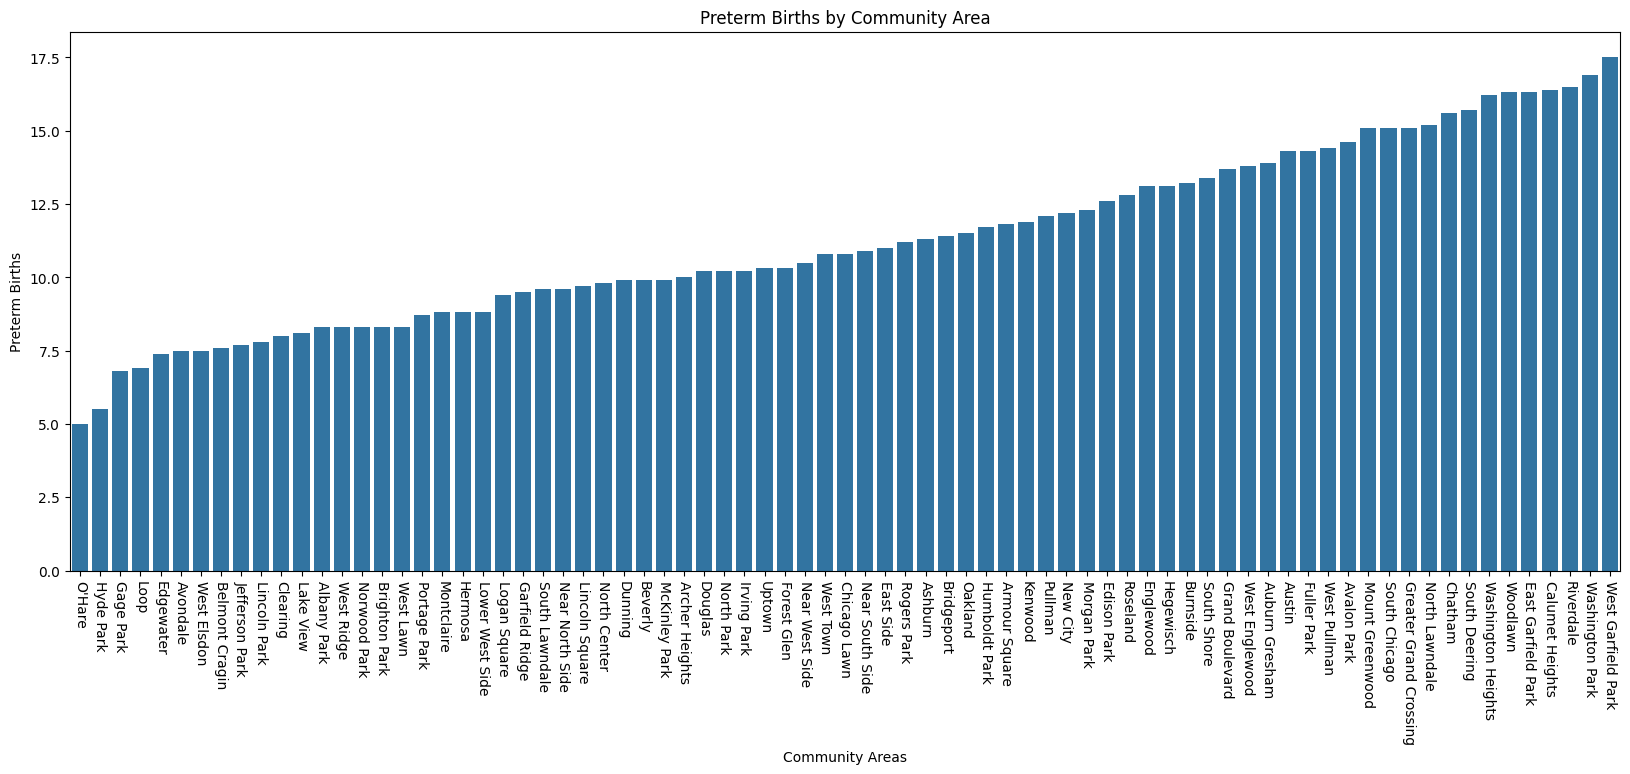

In [ ]:
# Make bar chart of your assigned variable
plt.figure(figsize=(20, 7)) # Set figure size (if needed)
ax = sns.barplot(x = 'Community Area', y = 'Preterm Births', data = dataset, errorbar = None) # Make bar chart
ax.set(title = 'Preterm Births by Community Area', xlabel = 'Community Areas', ylabel = 'Preterm Births') # Set chart title and axis labels
ax.tick_params(axis='x', rotation=270) # Rotate x-axis labels (if needed)

[Text(0.5, 1.0, 'Per Capita Income vs Preterm Births'),
 Text(0.5, 0, 'Preterm Births'),
 Text(0, 0.5, 'Per Capita Income')]

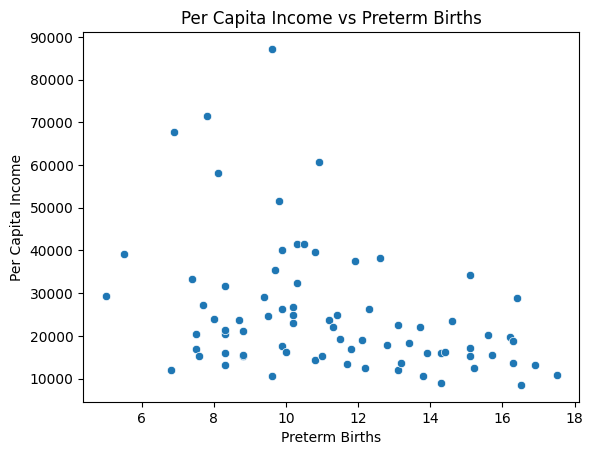

In [ ]:
# Make scatter plot of your assigned variable
ax = sns.scatterplot(x = 'Preterm Births', y = 'Per Capita Income', data = dataset) # Make scatter plot
ax.set(title = 'Per Capita Income vs Preterm Births', xlabel = 'Preterm Births', ylabel = 'Per Capita Income') # Set chart title and axis labels

[Text(0.5, 1.0, 'Preterm Births'), Text(0, 0.5, 'Percentage of Live Births')]

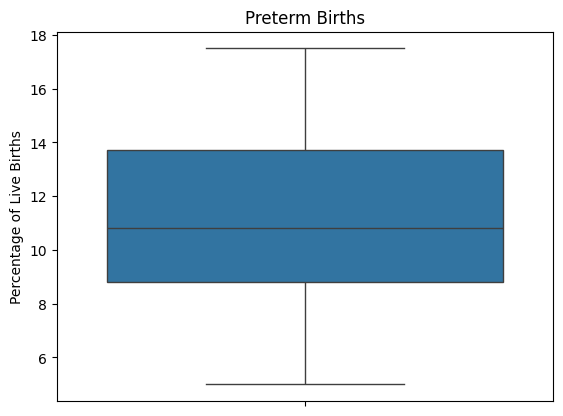

In [ ]:
# Make box plot of your assigned variable
ax = sns.boxplot(y = 'Preterm Births', data = dataset) # Make box plot
ax.set(title = 'Preterm Births', ylabel = 'Percentage of Live Births')

### **Part 4: Classification**
Training and Testing Decision Trees

**Create class label**

In [ ]:
# Create class label for your assigned variable (based on mean value)
def create_class_label (row):
    mean_value = dataset['Preterm Births'].mean()
    if row['Preterm Births'] > mean_value:
        return 1 # value of assigned variable > mean value (high)
    return 0 # value of assigned variable <= mean value (low)

In [ ]:
dataset['Class Label'] = dataset.apply(lambda row: create_class_label (row), axis = 1)
dataset.head()

,Community Area,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,Low Birth Weight,Prenatal Care,Preterm Births,Teen Birth Rate,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes,Stroke,Tuberculosis,Firearm,Class Label
75,O'Hare,29402,4.7,9.5,1.9,26.5,11.0,15.8,3.5,82.0,5.0,15.9,37.4,20.5,2.8,47.3,40.4,6.3,11.8,0
40,Hyde Park,39243,6.9,18.2,2.5,26.7,5.3,9.7,5.9,80.3,5.5,7.6,34.9,33.6,24.1,34.0,26.0,5.3,5.0,0
62,Gage Park,12014,14.0,20.8,17.4,40.4,54.1,21.8,6.8,80.4,6.8,61.4,34.1,23.4,41.1,65.0,51.2,7.0,11.1,0
31,Loop,67699,4.2,11.1,2.0,15.5,3.4,9.4,5.3,78.2,6.9,1.3,29.2,20.2,17.2,26.8,39.0,6.5,4.0,0
76,Edgewater,33364,9.0,16.6,3.9,23.4,9.0,12.1,7.5,76.1,7.4,15.1,40.1,18.5,23.7,48.8,31.5,10.5,3.9,0


**Divide the dataset into a training set (75% of the data) and a test set (25% of the data).**

In [ ]:
# Partition dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(dataset[['Tuberculosis',
'Dependency',
'No High School Diploma',
'Prenatal Care',
'Low Birth Weight','Lung Cancer'
]],
                                                    dataset['Class Label'],
                                                    test_size = 0.25,
                                                    random_state = 0)  # (predictors, class, test size, random state)

**<u>Using the training set</u>, build a decision tree to predict the class label based on the predictors.**

In [ ]:
# Build decision tree
model = tree.DecisionTreeClassifier(splitter="best",criterion = 'log_loss',class_weight={0:1,1:1,2:1,3:1,4:1,5:3})
model.fit(x_train, y_train) # (predictors, class)

DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 3},
                       criterion='log_loss')

[Text(0.42857142857142855, 0.9166666666666666, 'Low Birth Weight <= 11.75\nsamples = 57\nvalue = [33, 24]\nclass = Low'),
 Text(0.2857142857142857, 0.75, 'Lung Cancer <= 45.05\nsamples = 38\nvalue = [33, 5]\nclass = Low'),
 Text(0.14285714285714285, 0.5833333333333334, 'samples = 24\nvalue = [24, 0]\nclass = Low'),
 Text(0.42857142857142855, 0.5833333333333334, 'Low Birth Weight <= 7.65\nsamples = 14\nvalue = [9, 5]\nclass = Low'),
 Text(0.2857142857142857, 0.4166666666666667, 'samples = 5\nvalue = [5, 0]\nclass = Low'),
 Text(0.5714285714285714, 0.4166666666666667, 'Dependency <= 32.6\nsamples = 9\nvalue = [4, 5]\nclass = High'),
 Text(0.42857142857142855, 0.25, 'samples = 3\nvalue = [3, 0]\nclass = Low'),
 Text(0.7142857142857143, 0.25, 'No High School Diploma <= 27.5\nsamples = 6\nvalue = [1, 5]\nclass = High'),
 Text(0.5714285714285714, 0.08333333333333333, 'samples = 5\nvalue = [0, 5]\nclass = High'),
 Text(0.8571428571428571, 0.08333333333333333, 'samples = 1\nvalue = [1, 0]\ncla

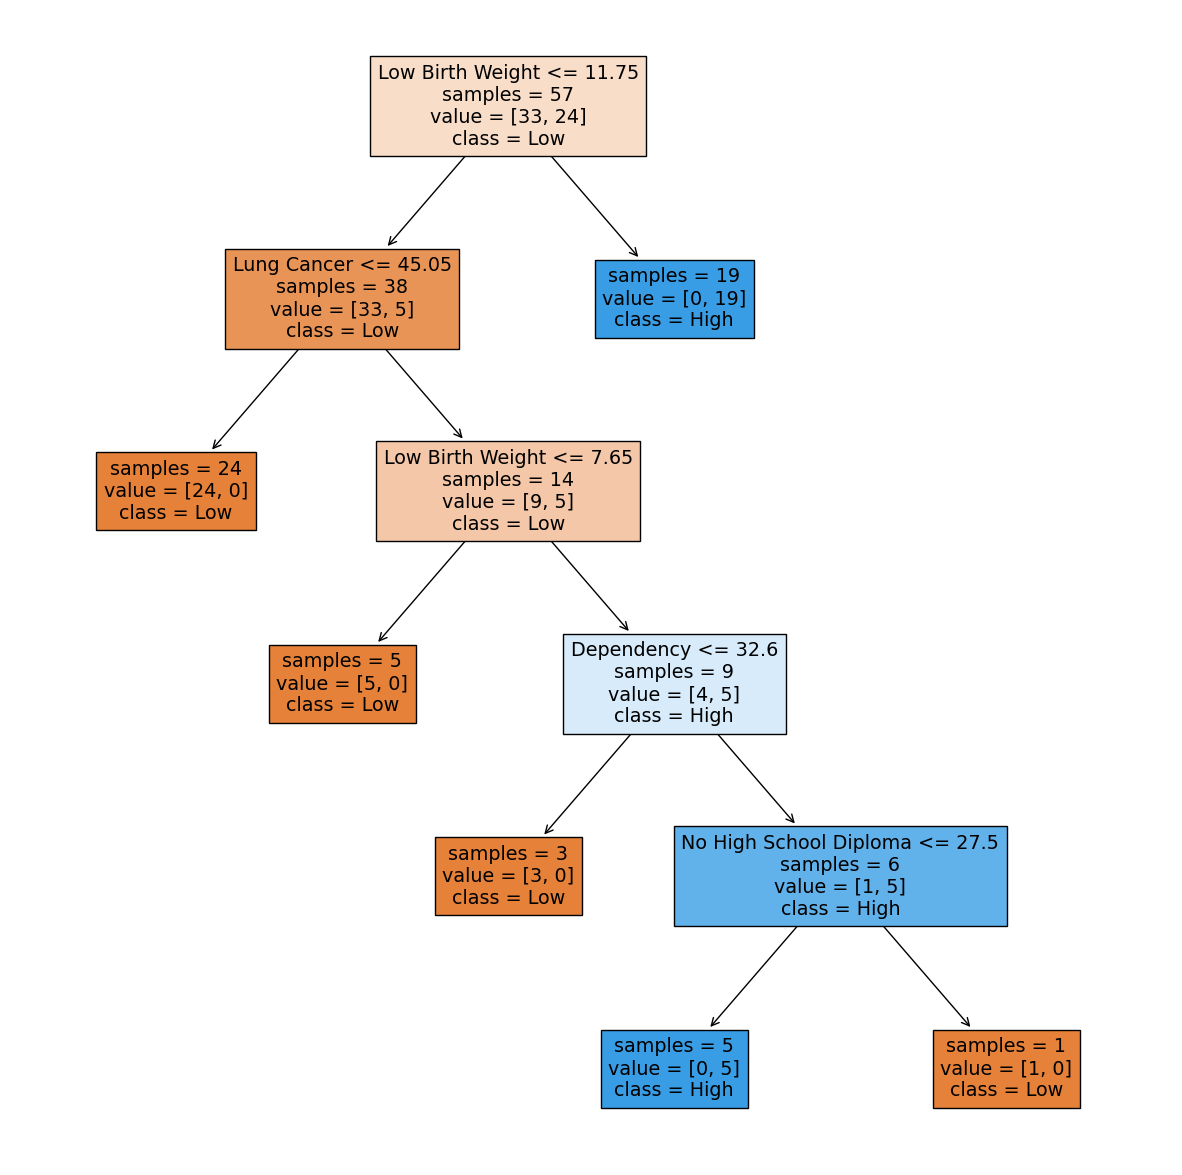

In [ ]:
# Plot decision tree
plt.figure(figsize = (15, 15)) # Set figure size (if needed)
tree.plot_tree(model, feature_names = ['Tuberculosis',
'Dependency',
'No High School Diploma',
'Prenatal Care', 'Low Birth Weight','Lung Cancer'

],      # feature_names indicates the names of the predictors
               class_names = ['Low', 'High'],     # class_names indicates the names of the classes
               filled = True, impurity = False)

**Evaluate the performance of this decision tree <u>on the test set</u>.**

In [ ]:
# Predict class labels for test set
y_pred = model.predict(x_test)
print(y_pred) # Print predicted class labels

[1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0]


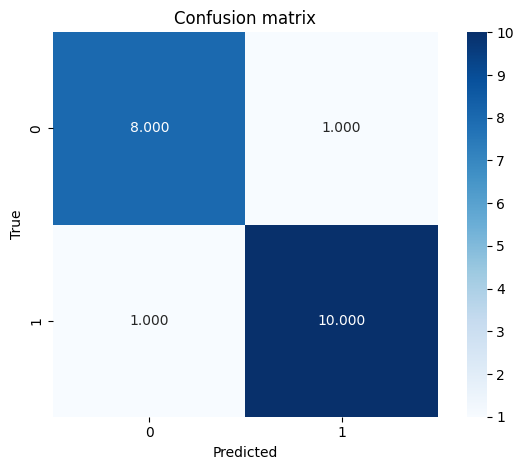

In [ ]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred) # Create confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues) # Plot confusion matrix
plt.ylabel('True') # Set y-axis label
plt.xlabel('Predicted') # Set x-axis label
plt.title('Confusion matrix') # Set chart title
plt.tight_layout()

In [ ]:
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # Compute accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # Compute error

0.9
0.09999999999999998


**What is the accuracy and error of the decision tree on the test set?**

*ANSWER*: Accuracy is 0.9 and Error is 0.0999998